<a href="https://colab.research.google.com/github/marcelomoresco/AppConvidados/blob/main/Prova_Data_Science_N1_MARCELO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prova Data Science N1

## <font color='red'>Importante: a prova é individual.</font>

**Instruções:**

1. Faça download deste notebook e carregue o mesmo na sua conta do Google Colab.
2. Responda às questões propostas.
3. Crie um repositório para o notebook, "commite" o notebook neste repositório.
4. Na tarefa de avaliação do Teams, envie o link do repositório. Arquivos enviados diretamente no Teams não serão considerados.
5. Commits no repositório após a data de entrega (combinada em sala de aula) serão desconsiderados.

# Objeto da avaliação

Você irá fazer o download do arquivo de dados matches.csv do [repositório do Github](https://raw.githubusercontent.com/mdietterle/repositorio_dados/main/matches.csv)

Todas as questões/atividades serão realizadas com base neste arquivo. É importante que você responda aos questionamentos propostos o mais completo possível, com a maior quantidade de detalhes que você conseguir incluir.

Não se contente com o básico, seja criativo nas respostas, indo além do tradicional.

## **Importante!!**

Antes de começar a responder, abra o arquivo de dados e entenda o dataset. Não será fornecido um dicionário de dados, é sua tarefa analisar o dataset e "inferir" o que são as colunas e a sua organização.

## Instalação de bibliotecas necessárias

Instale neste local todas as bibliotecas necessárias para resolução da avaliação.

In [ ]:
# Instalação de bibliotecas básicas
!pip install pandas

!pip install matplotlib

!pip install numpy

!pip install scikit-learn

!pip install seaborn

!pip install dash plotly pandas


## Estatísticas básicas do dataset


Carregue o arquivo de dados no notebook e exiba as características básicas do arquivo (shape, tipo de dados, dados ausentes, estatísticas básicas dos dados, etc)

In [ ]:
import pandas as pd

df = pd.read_csv('/content/sample_data/matches.csv')

# Shape
print("Shape do dataset:", df.shape)

# tipos de dados
print("\nTipos de dados:")
print(df.dtypes)

# dados ausentes
print("\nDados ausentes por coluna:")
print(df.isnull().sum())

# estatísticas descritivas
print("\nEstatísticas descritivas do dataset:")
print(df.describe())


Shape do dataset: (1389, 28)

Tipos de dados:
Unnamed: 0        int64
date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk              float64
pkatt           float64
season            int64
team             object
dtype: object

Dados ausentes por coluna:
Unnamed: 0         0
date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg       

## Dia da semana com placares mais altos

Crie um gráfico que responda em qual dia da semana os placares foram mais altos. O conceito de "placar mais alto" é a soma dos gols feitos no jogo.

Como a quantidade de jogos não é a mesma em todos os dias da semana (finais de semana tendem a ter mais jogos que em dias da semana - o que resultaria em placares mais altos nestes dias), você deverá encontrar uma forma de equalizar esta diferença na quantidade de jogos.

A resposta deverá ser um gráfico que demonstre claramente o comparativo dos dias.

<ipython-input-25-728e4437a914>:41: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




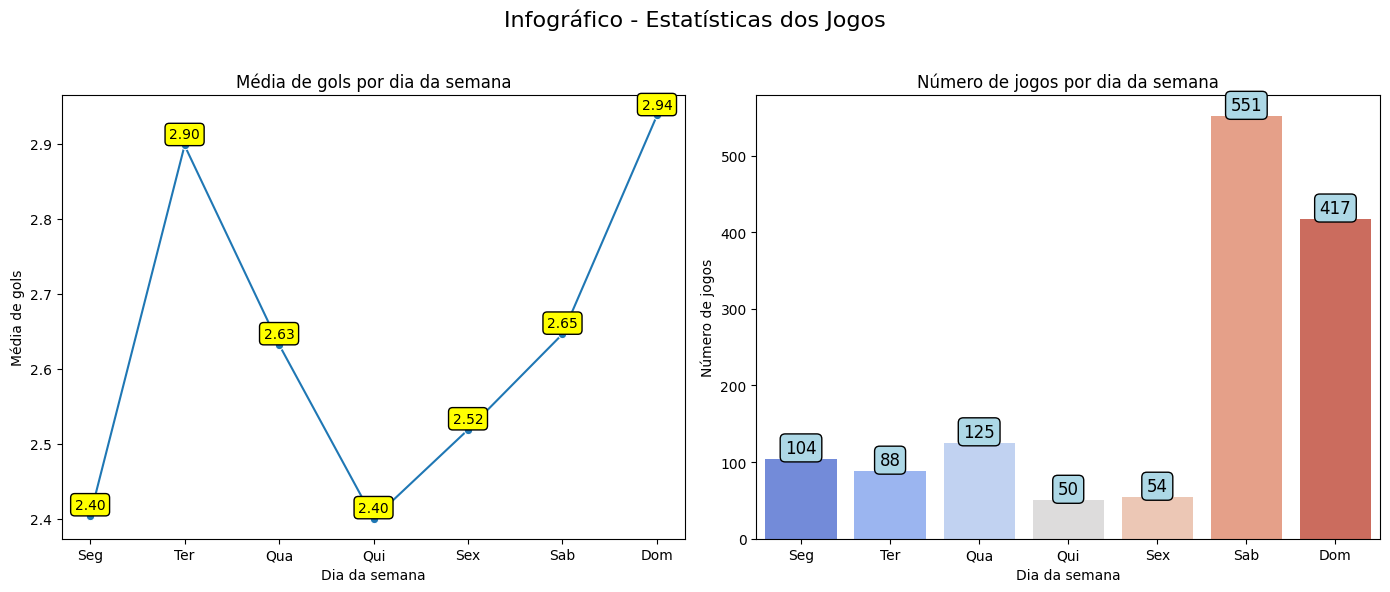

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/sample_data/matches.csv')

df['total_goals'] = df['gf'] + df['ga']

day_translation = {
    'Mon': 'Seg',
    'Tue': 'Ter',
    'Wed': 'Qua',
    'Thu': 'Qui',
    'Fri': 'Sex',
    'Sat': 'Sab',
    'Sun': 'Dom'
}

df['day'] = df['day'].map(day_translation)

avg_goals_by_day = df.groupby('day')['total_goals'].mean().reset_index()

ordered_days = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom']
avg_goals_by_day['day'] = pd.Categorical(avg_goals_by_day['day'], categories=ordered_days, ordered=True)
avg_goals_by_day = avg_goals_by_day.sort_values('day')

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Infográfico - Estatísticas dos Jogos', fontsize=16)

sns.lineplot(x='day', y='total_goals', data=avg_goals_by_day, marker='o', ax=axs[0])
axs[0].set_title('Média de gols por dia da semana')
axs[0].set_xlabel('Dia da semana')
axs[0].set_ylabel('Média de gols')

for x, y in zip(avg_goals_by_day['day'], avg_goals_by_day['total_goals']):
    axs[0].annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center',
                    bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='yellow'))

games_by_day = df['day'].value_counts().reindex(ordered_days).reset_index()
games_by_day.columns = ['day', 'games']
sns.barplot(x='day', y='games', data=games_by_day, palette='coolwarm', ax=axs[1])
axs[1].set_title('Número de jogos por dia da semana')
axs[1].set_xlabel('Dia da semana')
axs[1].set_ylabel('Número de jogos')

for bar in axs[1].patches:
    axs[1].annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center', size=12, xytext=(0, 8),
                    textcoords='offset points',
                    bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightblue'))


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Capitães

Quantos capitães diferentes cada equipe teve durante a temporada?

Responda em forma de um gráfico comparativo, apresentando os dados o mais claramente possível.

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('/content/sample_data/matches.csv')

captains_by_team = df.groupby('team')['captain'].nunique().reset_index()

captains_by_team.columns = ['team', 'unique_captains']

fig = px.bar(captains_by_team, x='team', y='unique_captains',
             title="Número de Capitães Diferentes por Equipe na Temporada",
             labels={'team': 'Equipe', 'unique_captains': 'Número de Capitães'},
             text='unique_captains')

fig.update_traces(textposition='outside')
fig.update_layout(xaxis_title='Equipe', yaxis_title='Número de Capitães',
                  title_x=0.5, height=600)

fig.show()


## Formação Tática

Qual a formação tática mais comum para cada equipe de acordo com o resultado obtido (Ex: para vitórias, a formação mais comum é X, para empates Y e para Z em derrotas).

**Importante** responda de forma que seja possível fazer comparativos entre equipes.

Responda com um gráfico.

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('/content/sample_data/matches.csv')

df['team'] = df['team'].replace({
    'Manchester City': 'Man City',
    'Manchester United': 'Man Utd',
    'Chelsea': 'Chelsea',
    'Liverpool': 'Liverpool',
    'Arsenal': 'Arsenal',
})

df['result'] = df['result'].replace({
    'W': 'Vitória',
    'D': 'Empate',
    'L': 'Derrota'
})

formation_count = df.groupby(['team', 'result', 'formation']).size().reset_index(name='formation_count')

most_common_formation = formation_count.loc[formation_count.groupby(['team', 'result'])['formation_count'].idxmax()]

fig = px.bar(most_common_formation, x='team', y='formation_count', color='formation',
             facet_col='result', title="Formação Tática Mais Comum por Equipe e Resultado",
             labels={'formation_count': 'Número de Jogos', 'team': 'Equipe', 'formation': 'Formação'},
             hover_data=['formation'])

fig.update_layout(height=600, title_x=0.5)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.show()


## Posse de bola

Qual a média de posse de bola da equipe mandante quando ela perdeu o jogo?

Responda em forma de gráfico para poder comparar entre todas as equipes.

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('/content/sample_data/matches.csv')

df['result'] = df['result'].replace({'L': 'Derrota', 'W': 'Vitória', 'D': 'Empate'})
home_team_losses = df[(df['venue'] == 'Home') & (df['result'] == 'Derrota')]

avg_possession_by_team = home_team_losses.groupby('team')['poss'].mean().reset_index()

fig = px.pie(avg_possession_by_team, names='team', values='poss',
             title="Média de Posse de Bola das Equipes Mandantes em Derrotas",
             hole=0.4, hover_data=['poss'], labels={'poss': 'Posse de Bola (%)'})

fig.update_traces(hovertemplate="Equipe: %{label}<br>Posse de Bola: %{value:.2f}%")

fig.update_layout(height=600, title_x=0.5)

fig.show()


## Classificação

Qual a classificação final do campeonato?

Responda em forma de tabela, ordenada do primeiro colocado ao último.
Você deverá apresentar o brasão do time (pode ser obtido online [aqui](https://logodetimes.com/premier-league/), mas automatize a busca, não salve o logo localmente), o nome, a quantidade de pontos e a posição final no campeonato.

**OBS** Vitória vale 3 pontos, empates 1 ponto e derrota 0 pontos.

In [35]:
import pandas as pd
from IPython.display import display

df = pd.read_csv('/content/sample_data/matches.csv')

df['points'] = df['result'].apply(lambda x: 3 if x == 'W' else 1 if x == 'D' else 0)

team_points = df.groupby('team')['points'].sum().reset_index()

team_points = team_points.sort_values(by='points', ascending=False).reset_index(drop=True)

team_points['position'] = team_points.index + 1

team_logos = {
    'Arsenal': 'https://logodetimes.com/times/arsenal-football-club/arsenal-football-club-256.png',
    'Aston Villa': 'https://logodetimes.com/times/aston-villa-football-club/aston-villa-football-club-256.png',
    'Brentford': 'https://logodetimes.com/times/brentford-football-club/brentford-football-club-256.png',
    'Brighton': 'https://logodetimes.com/times/brighton-hove-albion-football-club/brighton-hove-albion-football-club-256.png',
    'Burnley': 'https://logodetimes.com/times/burnley-football-club/burnley-football-club-256.png',
    'Chelsea': 'https://logodetimes.com/times/chelsea-football-club/chelsea-football-club-256.png',
    'Crystal Palace': 'https://logodetimes.com/times/crystal-palace-football-club/crystal-palace-football-club-256.png',
    'Everton': 'https://logodetimes.com/times/everton-football-club/everton-football-club-256.png',
    'Leeds United': 'https://logodetimes.com/times/leeds-united-football-club/leeds-united-football-club-256.png',
    'Leicester City': 'https://logodetimes.com/times/leicester-city-football-club/leicester-city-football-club-256.png',
    'Liverpool': 'https://logodetimes.com/times/liverpool-football-club/liverpool-football-club-256.png',
    'Manchester City': 'https://logodetimes.com/times/manchester-city-football-club/manchester-city-football-club-256.png',
    'Manchester United': 'https://logodetimes.com/times/manchester-united-football-club/manchester-united-football-club-256.png',
    'Newcastle United': 'https://logodetimes.com/times/newcastle-united-football-club/newcastle-united-football-club-256.png',
    'Norwich City': 'https://logodetimes.com/times/norwich-city-football-club/norwich-city-football-club-256.png',
    'Southampton': 'https://logodetimes.com/times/southampton-football-club/southampton-football-club-256.png',
    'Tottenham': 'https://logodetimes.com/times/tottenham-hotspur-football-club/tottenham-hotspur-football-club-256.png',
    'Watford': 'https://logodetimes.com/times/watford-football-club/watford-football-club-256.png',
    'West Ham': 'https://logodetimes.com/times/west-ham-united-football-club/west-ham-united-football-club-256.png',
    'Wolverhampton': 'https://logodetimes.com/times/wolverhampton-wanderers-football-club/wolverhampton-wanderers-football-club-256.png'
}

default_logo = 'https://logodetimes.com/wp-content/uploads/logo-placeholder.png'

def get_team_logo(team_name):
    return f'<img src="{team_logos.get(team_name, default_logo)}" width="50" height="50">'

team_points['logo'] = team_points['team'].apply(get_team_logo)

def highlight_top_team(s):
    is_max = s == s.max()
    return ['background-color: lightgreen' if v else '' for v in is_max]

def filter_teams(team_filter=None, position_filter=None):
    filtered_df = team_points.copy()

    if team_filter:
        filtered_df = filtered_df[filtered_df['team'].str.contains(team_filter, case=False)]

    if position_filter:
        filtered_df = filtered_df[filtered_df['position'] == position_filter]

    filtered_df = filtered_df[['logo', 'team', 'points', 'position']]

    styled_table = filtered_df.style.apply(highlight_top_team, subset=['points']).format({
        'points': '{:.2f}'
    }).set_table_attributes('class="dataframe"').set_properties(**{
        'border': '1px solid black',
        'text-align': 'center'
    })

    return styled_table

team_filter = None
position_filter = None

display(filter_teams(team_filter, position_filter))


,logo,team,points,position
0,,Manchester City,166.00,1
1,,Chelsea,132.00,2
2,,Manchester United,128.00,3
3,,Arsenal,121.00,4
4,,Tottenham Hotspur,120.00,5
5,,West Ham United,117.00,6
6,,Leicester City,108.00,7
7,,Wolverhampton Wanderers,94.00,8
8,,Leeds United,93.00,9
9,,Aston Villa,92.00,10


## Público

Crie uma visualização que apresente o público total de cada equipe, e também um detalhamento por jogos.

Apresentar os dados usando a técnica "DrillDown" será considerado um "plus". A visualização DrillDown permite que gráficos sejam detalhados com cliques em itens do gráfico.

Um exemplo com tabelas pode ser encontrado [aqui](https://dash.plotly.com/dash-ag-grid/enterprise-master-detail).

Um exemplo usando gráficos pode ser encontrado [aqui](https://community.plotly.com/t/show-and-tell-drill-down-functionality-in-dash-using-callback-context/54403?u=atharvakatre)

In [32]:
!pip install dash plotly pandas

In [31]:

import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
from dash.exceptions import PreventUpdate

df = pd.read_csv('/content/sample_data/matches.csv')

df_filtered = df[['team', 'attendance', 'date', 'opponent', 'venue', 'season']].dropna()

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Público Total por Equipe e Detalhamento por Jogos"),

    dcc.Dropdown(
        id='season-filter',
        options=[{'label': season, 'value': season} for season in df_filtered['season'].unique()],
        value=None,
        placeholder="Selecione uma Temporada",
        clearable=True,
    ),

    dcc.Dropdown(
        id='venue-filter',
        options=[{'label': venue, 'value': venue} for venue in df_filtered['venue'].unique()],
        value=None,
        placeholder="Selecione o Local (Home/Away)",
        clearable=True,
    ),

    dcc.Dropdown(
        id='opponent-filter',
        options=[{'label': opponent, 'value': opponent} for opponent in df_filtered['opponent'].unique()],
        value=None,
        placeholder="Selecione um Adversário",
        clearable=True,
    ),

    dcc.Graph(id='total-attendance-graph'),

    dcc.Graph(id='match-details-graph'),
])

@app.callback(
    Output('total-attendance-graph', 'figure'),
    [Input('season-filter', 'value'),
     Input('venue-filter', 'value'),
     Input('opponent-filter', 'value')]
)
def update_total_attendance_graph(selected_season, selected_venue, selected_opponent):
    filtered_df = df_filtered.copy()
    if selected_season:
        filtered_df = filtered_df[filtered_df['season'] == selected_season]
    if selected_venue:
        filtered_df = filtered_df[filtered_df['venue'] == selected_venue]
    if selected_opponent:
        filtered_df = filtered_df[filtered_df['opponent'] == selected_opponent]

    team_total_attendance = filtered_df.groupby('team')['attendance'].sum().reset_index()

    fig = px.bar(team_total_attendance, x='team', y='attendance',
                 title='Público Total por Equipe',
                 labels={'team': 'Equipe', 'attendance': 'Público Total'},
                 text_auto=True)

    fig.update_layout(clickmode='event+select', xaxis={'categoryorder':'total descending'})
    return fig

@app.callback(
    Output('match-details-graph', 'figure'),
    [Input('total-attendance-graph', 'clickData'),
     Input('season-filter', 'value'),
     Input('venue-filter', 'value'),
     Input('opponent-filter', 'value')]
)
def update_match_details_graph(clickData, selected_season, selected_venue, selected_opponent):
    if clickData is None:
        raise PreventUpdate

    team_clicked = clickData['points'][0]['x']

    filtered_df = df_filtered[df_filtered['team'] == team_clicked]
    if selected_season:
        filtered_df = filtered_df[filtered_df['season'] == selected_season]
    if selected_venue:
        filtered_df = filtered_df[filtered_df['venue'] == selected_venue]
    if selected_opponent:
        filtered_df = filtered_df[filtered_df['opponent'] == selected_opponent]

    fig = px.bar(filtered_df, x='date', y='attendance', color='opponent',
                 title=f'Público por Jogos da Equipe: {team_clicked}',
                 labels={'date': 'Data', 'attendance': 'Público', 'opponent': 'Oponente'},
                 text_auto=True)

    fig.update_layout(bargap=0.2,
                      xaxis_tickangle=-45,
                      xaxis={'categoryorder': 'total ascending'},
                      height=600)

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>